# Inductive and Deductive Reasoning
Inductive reasoning is going from specific data to something more general while deductive reasoning is using large amounts of information to make a specific conclusion.
Inductive ex. Everytime you see a dog they bark, all dogs bark
Deductive reasoning. All people wear purple shirts, john is a person therefore he wears purple shirts.


In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from xgboost import XGBClassifier
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
X = pd.DataFrame(X)
y = pd.DataFrame(y)
# Removed Null values for preprocessing, as well as used standard scalar, over and undersampling don't seem neccesary for this dataset. Changed target from 0-4 to 0-1, 0 being no heart disease, 1 being heart disease
def mean_fill_na(name):
    mean = X[name].mean()
    X[name] = X[name].fillna(mean)
mean_fill_na('ca')
mean_fill_na('thal')
y['num'] = np.where(y['num']>0,1,0)

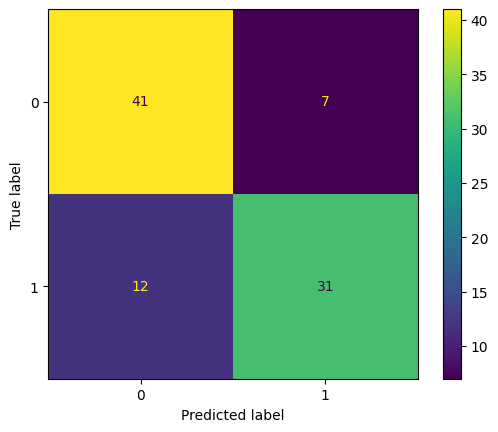

In [194]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 32)
model = tree.DecisionTreeClassifier(max_depth = 9, random_state=32,min_impurity_decrease=0.01)
#adding min_impurity_decrease improved results
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

C:\Users\jedwa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8241758241758241

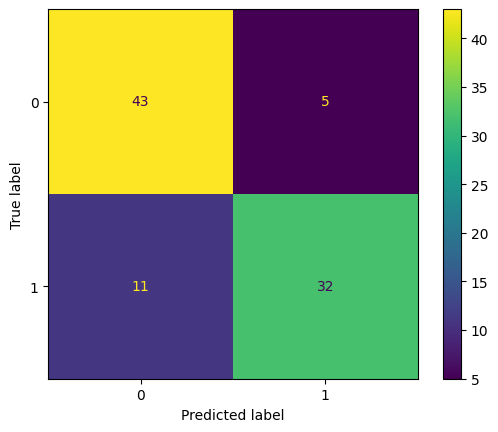

In [195]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Standardized the data, increased the estimators and added min_impurity_decrease
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=32,min_impurity_decrease=0.01)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
rf.score(X_test, y_test)

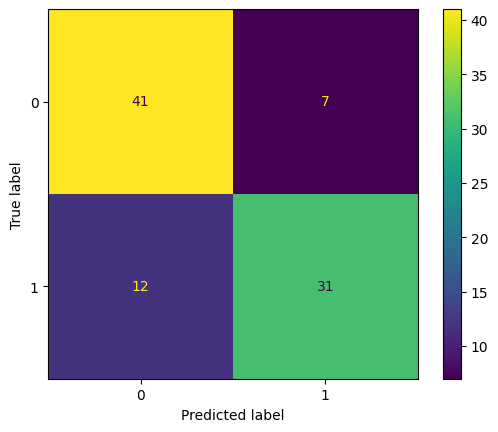

In [196]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 32)
#Couldn't improve however I tested stratify and different testsizes but both already set at optimal.
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
